En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


Un aspecto a tener en cuenta es la elección de la hoja "Velocidad % por prov" y no "Accesos por velocidad", ya que esta última solo registra las conexiones inferiores a los 30Mbps, que son muy por debajo del umbral del promedio de conexiones en la mayoría del país (a expeción de provincias como Formosa y La Rioja) 

In [59]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()

In [60]:
# Se cargan los datos de la hoja llamada "Velocidad % por prov"
df_internet_vxp = pd.read_excel('../Data/Internet.xlsx', sheet_name='Velocidad % por prov')


In [78]:
df_internet_vxp.head(6)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50
5,2024,1,Córdoba,114.89


In [72]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_internet_vxp.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes.count()


0

Se puede observar que no hay valores faltantes en los registros.

In [63]:
# Verificación de registros duplicados
duplicados = df_internet_vxp.duplicated().sum()
duplicados

0

Tampoco se registran valores duplicados

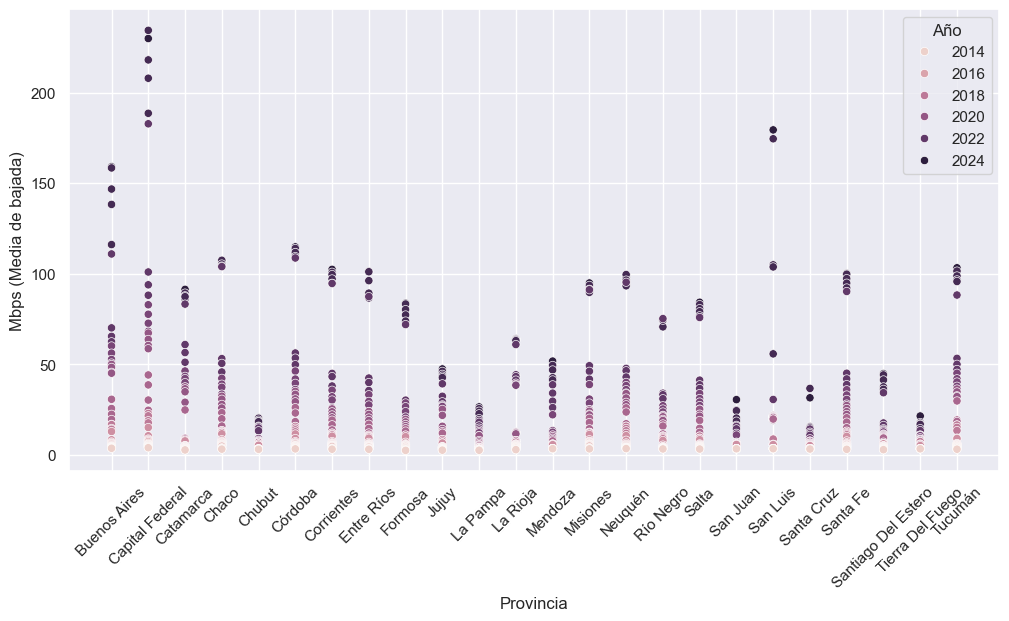

In [79]:
# Se crea un gráfico para comparar el promedio de la velocidad de bajada por cada provincia 

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_internet_vxp, x='Provincia', y='Mbps (Media de bajada)', hue='Año')
plt.xticks(rotation=45)
plt.show()


Como se puede ver, en Capital Federal se percibe una bajada muy superior al resto de las provincias de Argentina, y con un fuerte incremento en el último año. La diferencia seguramente es debido a la cantidad de habitantes que hay en la ciudad, además de la actividad laboral.

Por otro lado, se ve también cómo en las provincias mas centrales del país el promedio es similar, también con mayor aumento en el último año, y en las provincias del sur argentino el promedio de descarga es mucho menor.

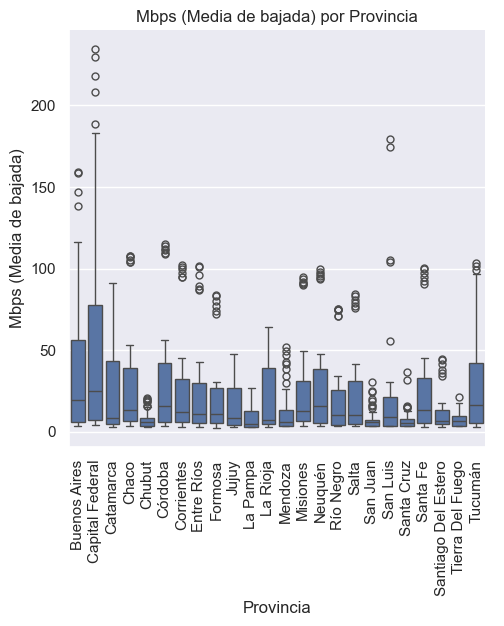

In [76]:
# Se crea un gráfico con formato boxplot para detectar valores atípicos

sns.catplot(x='Provincia', y='Mbps (Media de bajada)', kind='box', data=df_internet_vxp)
plt.title('Mbps (Media de bajada) por Provincia')
plt.xticks(rotation=90)
plt.show()

En este gráfico se representa la distribución de los valores. Se muestran los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto los puntos que se determinan como valores atípicos.

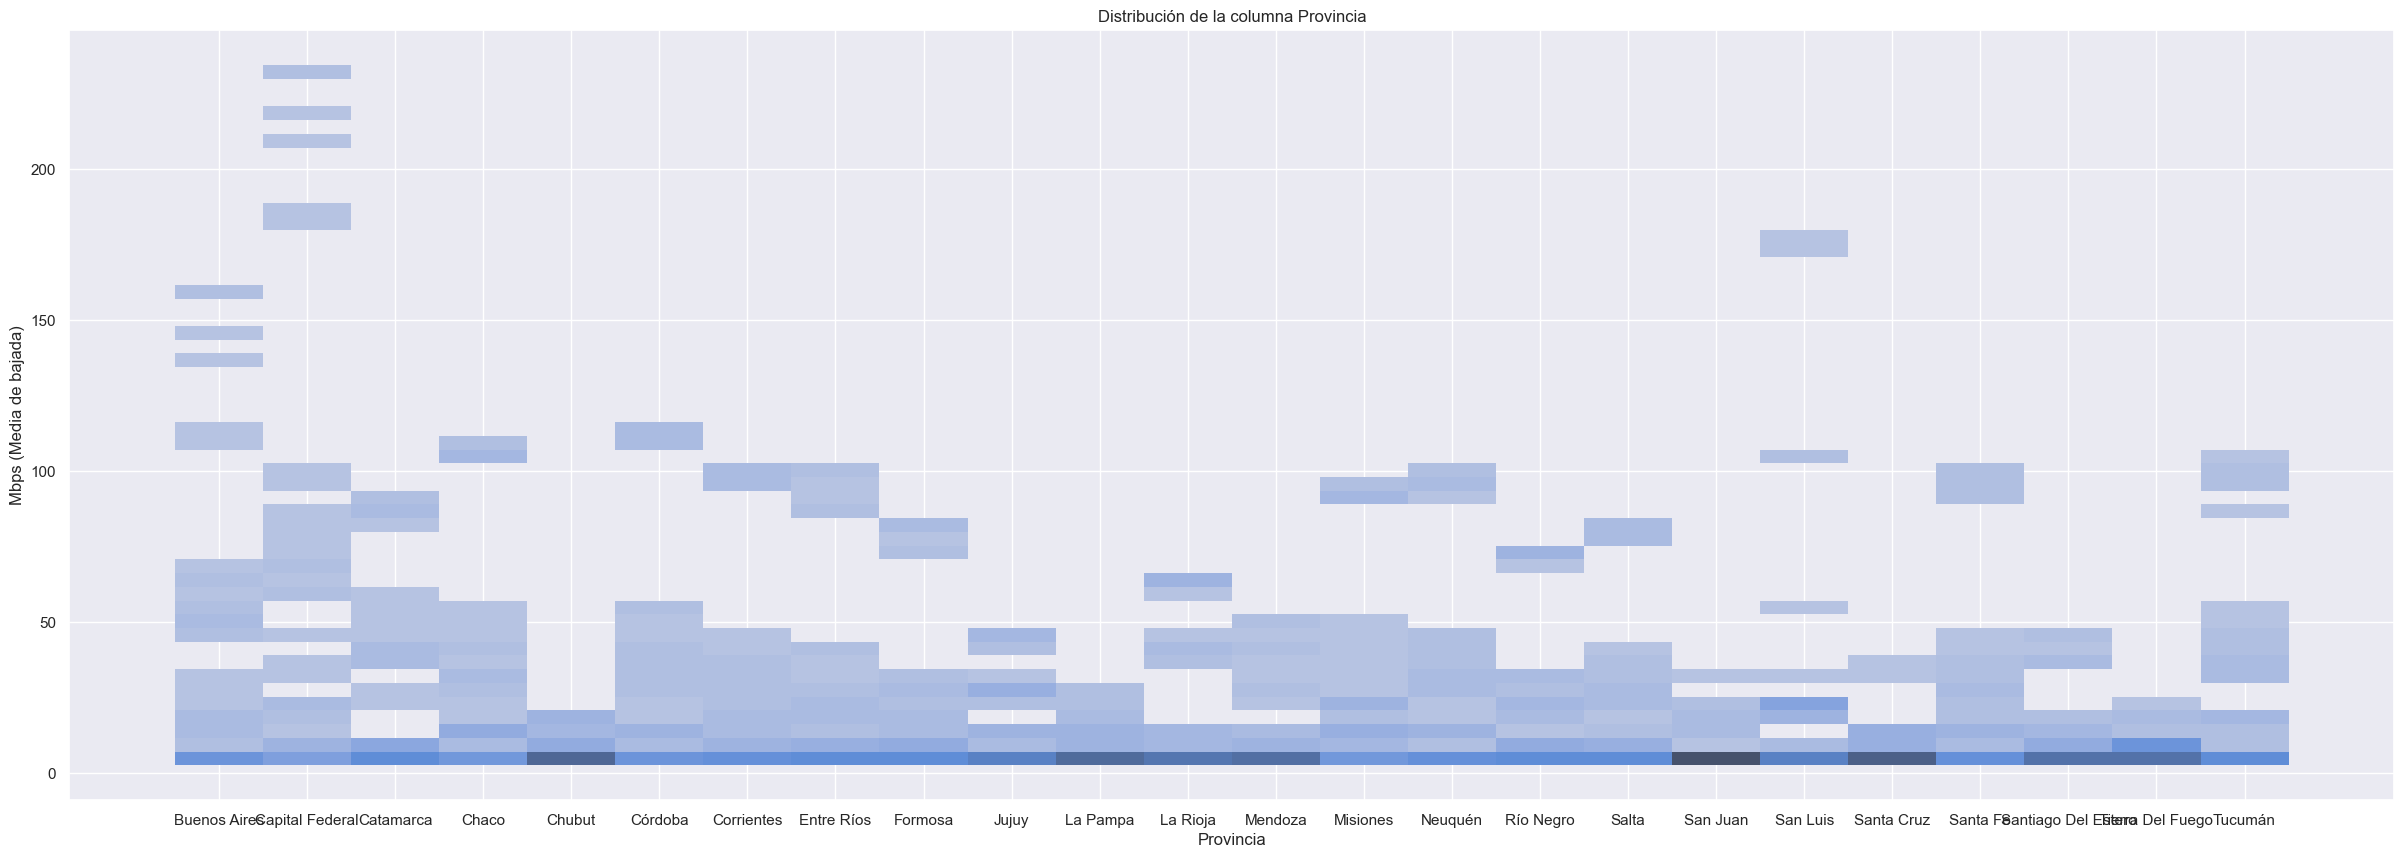

In [66]:
# Histograma de la columna Provincia

plt.figure(figsize=(30, 10))
sns.histplot(df_internet_vxp, x='Provincia', y='Mbps (Media de bajada)', kde=True)
plt.title('Distribución de la columna Provincia')
plt.show()


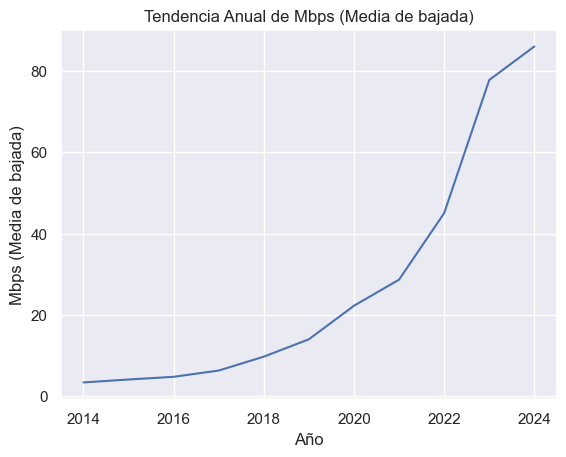

In [69]:
# Se crea el gráfico lineal para representar el crecimiento de la media ne bajada de datos

df_internet_vxp.groupby('Año')['Mbps (Media de bajada)'].mean().plot()
plt.title('Tendencia Anual de Mbps (Media de bajada)')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.show()
